Pablo Lorente Domínguez

### Datos:
Trabajamos como científicos de datos para una empresa de retail que, debido al cambio en los hábitos de consumo de los clientes, está potenciando ampliamente el servicio de venta online. La empresa quiere realizar un modelo de aprendizaje automático para clasificar a los clientes en función de la probabilidad de generar ingresos al comprar en la web.

El objetivo es realizar una serie de acciones específicas para los clientes que es más probable que hagan compras en la web.

Para ello, la empresa ha ido recopilando datos con su herramienta de Google Analytics. Cuenta con datos de sesiones, cada una de ellas de un cliente distinto en un periodo de un año.

### Información de los datos:
- El conjunto de datos consta de diez atributos numéricos y ocho categóricos.
- El atributo revenue puede ser usado como la etiqueta de la clase.
- Administrative , administrative duration , informational, informational duration , product related y product related duration representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total dedicado a cada una de estas categorías de páginas. Los valores de estas características se derivan de la información del URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando el usuario realiza una acción, por ejemplo, pasar de una página a otra.
- Las características bounce rate , exit rate y page value representan las métricas medidas por Google Analytics para cada página del sitio de comercio electrónico.
El valor de la característica bounce rate de una página web se refiere al porcentaje de visitantes que entran en el sitio desde esa página y luego salen (rebote) sin activar ninguna otra solicitud al servidor de análisis durante esa sesión.
El valor de la característica exit rate para una página web específica se calcula como para todas las visitas a la página, el porcentaje que fueron las últimas en la sesión.
La función Page Value representa el valor medio de una página web que un usuario ha visitado antes de completar una transacción de comercio electrónico.   
- La característica de special day indica la cercanía de la hora de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, San Valentín) en el que es más probable que las sesiones finalicen con una transacción.
El valor de este atributo se determina teniendo en cuenta la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega.
Por ejemplo, para San Valentín, este valor toma un valor distinto de 0 entre el 2 y el 12 de febrero, 0 antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero.
-El conjunto de datos también incluye el sistema operativo, el navegador, la región, el tipo de tráfico, el tipo de visitante como visitante que regresa o como nuevo visitante, un valor booleano que indica si la fecha de la visita es de fin de semana, y el mes del año.

### Se pide:

#### Tareas que nos pide la empresa

1. Realización de un análisis de las variables del dataset de Google Analytics como pueden ser histogramas,boxplots, etc. Cualquier otro análisis es bienvenido, siempre explicándolo y con un sentido de negocio.

2. Tratamiento de los valores faltantes, outliers, etc., en caso de que los hubiese. Si hay valores con missings,habrá que eliminarlos con el método de Pandas llamado Dropna().a.

3. Tratamiento de categóricas, pasándolas a numéricas por medio de dummies, mapeándolas o utilizando un label encoder. Hay que justificar las operaciones que se realizan.

4. Si existe alguna variable que se necesite borrar, habrá que borrara y justificarlo.

5. Estandariza los datos.

6. Dividir los datos en train y en test. Con los datos de train se pretende ajustar modelos con CrossValidation y GridSearch.
 - Utilizar un modelo lineal. Entre los modelos lineales están las regresiones logísticas, las  regresiones lineales, etc.
 - Utilizar un modelo de redes neuronales.
 - Utilizar cualquier otro modelo de clasificación.

7. Optimizar algún parámetro de cada modelo utilizando CrossValidation y GridSearch, o de la forma que se estime oportuna, siempre justificándolo.

8. Elegir el mejor modelo de los tres según la métrica ROC en CrossValidation. Predecir Test y obtener una métrica estimada.

9. Umbralizar las probabilidades utilizando el umbral que maximice el área bajo la curva ROC.

10. El entregable final será un Jupyter Notebook en el que se realicen todos los análisis y los modelos.


Vamos a empezar por cargar las librerías

In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import scikitplot as skplt
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Cargamos las funciones pertinentes

In [2]:
def relaciones_vs_target(X, Y, return_type='axes'):
    '''
    Función que representa gráficos de dispersión de las variables
    en X en función a la variable Y
    '''
    fig_tot = (len(X.columns))
    fig_por_fila = 5.
    tamanio_fig = 5.
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+5 ) )
    c = 0 
    for i, col in enumerate(X.columns):
        plt.subplot(num_filas, fig_por_fila, i+1)
        sns.scatterplot(x=X[col], y=Y)
        plt.title( '%s vs %s' % (col, 'target') )
        plt.ylabel('Target')
        plt.xlabel(col)
    plt.show()

def represento_doble_hist(x_1, x_0, n_bins=11, title='', label_1='Clase 1', 
                          label_0='Clase 0', density=0):
    '''
    Función que recibe dos distribuciones de probabilidad y las representa
    en el mismo gráfico
    '''
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='red')    
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='green')
    plt.title(title)
    plt.legend(loc='best') 

    
def hist_pos_neg_feat(x, y, density=0, nbins=11, targets=(0,1)):
    fig_tot = len(x.columns)
    fig_tot_fila = 4.; fig_tamanio = 4.
    num_filas = int( np.ceil(fig_tot/fig_tot_fila) )
    plt.figure( figsize=( fig_tot_fila*fig_tamanio+2, num_filas*fig_tamanio+2 ) )
    target_neg, target_pos = targets
    for i, feat in enumerate(x.columns):
        plt.subplot(num_filas, fig_tot_fila, i+1);
        plt.title('%s' % feat)
        idx_pos = y == target_pos
        idx_neg= y == target_neg
        represento_doble_hist(x[feat][idx_pos].values, x[feat][idx_neg].values, nbins, 
                   density = density, title=('%s' % feat)) 
        

# Función para ver mejor mis valores negativos y positivos
def color_df(val):
    color ='red' if val <0 else 'green'
    return 'color: %s' % color

In [3]:
XY =pd.read_csv('online_shoppers_intention.csv')

Procedemos con una exploración de los datos

In [4]:
print(u'- El número de filas en el dataset es: {}'.format(XY.shape[0]))
print(u'- El número de columnas en el dataset es: {}'.format(XY.shape[1]))
print(u'- Los nombres de las variables son: {}'.format(list(XY.columns)))
XY[:2]

- El número de filas en el dataset es: 12330
- El número de columnas en el dataset es: 18
- Los nombres de las variables son: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [5]:
XY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Buscamos posibles valores nulos en las variables.

In [6]:
XY.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Como son pocos valores procederemos a eliminarlos

In [7]:
XY = XY.dropna()
XY.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Seguidamente vamos a convertir las variables categóricas a numéricas. Como hemos visto en la exploración previa las variables a convertir son **Month, VisitorType, Weekend y Revenue.** Las dos primeras son *object* y las dos segundas *bool*.

In [8]:
XY.select_dtypes(exclude=['number']).columns

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

In [9]:
XY['Month'].value_counts()

May     3363
Nov     2998
Mar     1894
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [10]:
XY['VisitorType'].value_counts()

Returning_Visitor    10537
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [11]:
dicMonth ={'May':5,'Nov':11,'Mar':3,'Dec':12,'Oct':10, 'Sep':9,'Aug':8, 'Jul':7,'June':6, 'Feb':2}
dicVisitor ={'Returning_Visitor':0,'New_Visitor':1,'Other':2}
XY["Month"].replace(dicMonth, inplace=True)
XY["VisitorType"].replace(dicVisitor, inplace=True)

Para las variables **Month y VisitorType** realizaremos un mapeo. En **Month**  tiene que ir cada número del mes asociado al nombre. En **VisitorType** le asignamos un valor a cada categoría.

In [12]:
le =LabelEncoder()

In [13]:
XY['Weekend'].value_counts()

False    9451
True     2865
Name: Weekend, dtype: int64

In [14]:
XY['Revenue'].value_counts()

False    10408
True      1908
Name: Revenue, dtype: int64

Para las variables **Weekend y Revenue** codificamos con LabelEncode, ya que no nos preocupa en que orden quede codificado cada valor.

In [15]:
XY.Weekend= le.fit_transform(XY.Weekend.values)
XY.Revenue= le.fit_transform(XY.Revenue.values)

In [16]:
print (XY['Revenue'].value_counts())
print (XY['Revenue'].value_counts())

0    10408
1     1908
Name: Revenue, dtype: int64
0    10408
1     1908
Name: Revenue, dtype: int64


Ahora los False son 0 y los True 1.

In [17]:
XY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  int64  
 11  OperatingSystems         12316 non-null  int64  
 12  Browser                  12316 non-null  int64  
 13  Region                   12316 non-null  int64  
 14  TrafficType           

Ahora que todas nuestras variables son de tipo númerico vamos a separar nuestra target Y del resto de variables.

In [18]:
X = XY.drop('Revenue', axis=1)
Y = XY['Revenue']

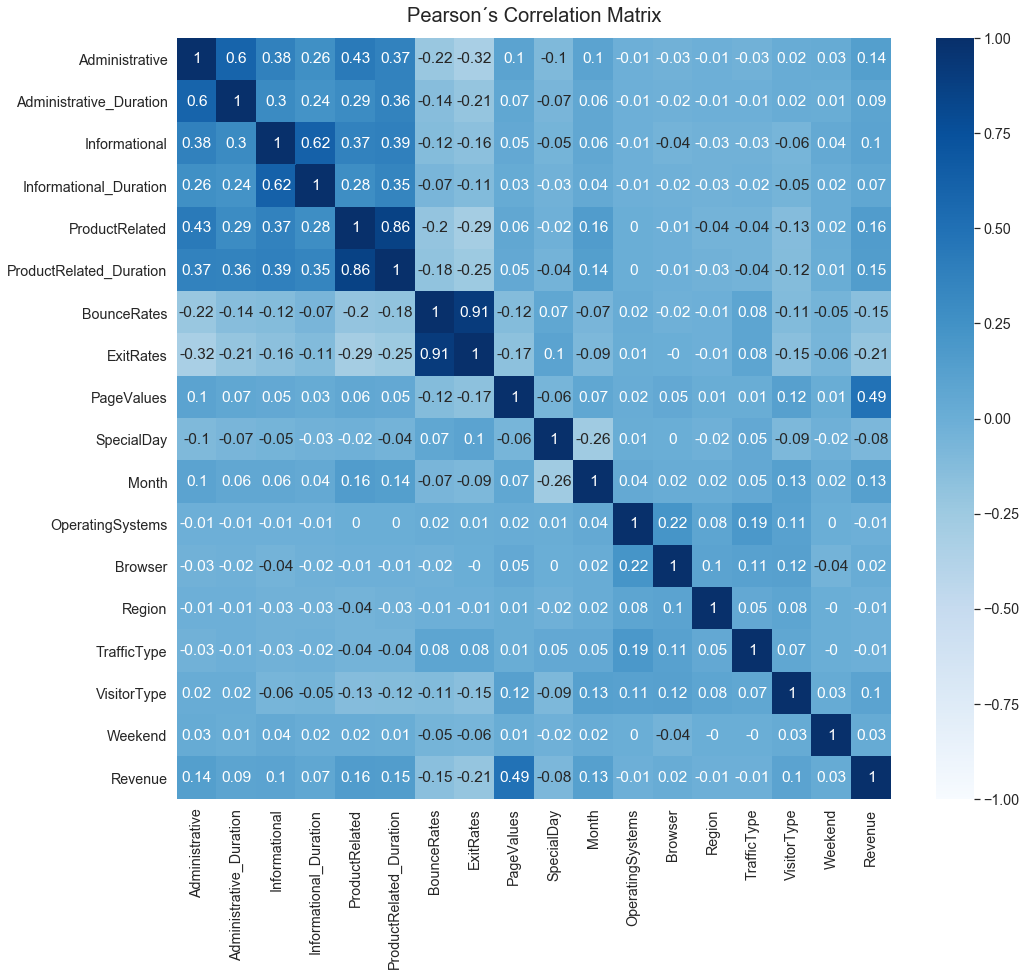

In [19]:
matriz_correlacion = XY.corr(method='pearson')
plt.figure(figsize=(16, 14))
sns.set(font_scale=1.3)
corr_heatmap = round(matriz_correlacion, 2)
heatmap = sns.heatmap(corr_heatmap, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Pearson´s Correlation Matrix', fontdict={'fontsize':20}, pad=16);
plt.show()

In [20]:
correlaciones_target = matriz_correlacion.values[ -1, : -1]
indices_inversos =  abs(correlaciones_target[ : ]).argsort()[ : : -1]
diccionario = {}
for nombre, correlacion in zip( XY.columns[indices_inversos], 
                               list(correlaciones_target[indices_inversos])):diccionario[nombre] = correlacion
pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la Target']).style.applymap(color_df)

,Correlación con la Target
PageValues,0.492494
ExitRates,-0.206886
ProductRelated,0.158280
ProductRelated_Duration,0.152130
BounceRates,-0.150621
Administrative,0.138631
Month,0.126868
VisitorType,0.098309
Informational,0.095085
Administrative_Duration,0.093395


En la tabla superior podemos ver las variables ordenadas de mayor a menor correlación con la target. Las que tienen mayor correlación son **PageValues y ExitRates**.

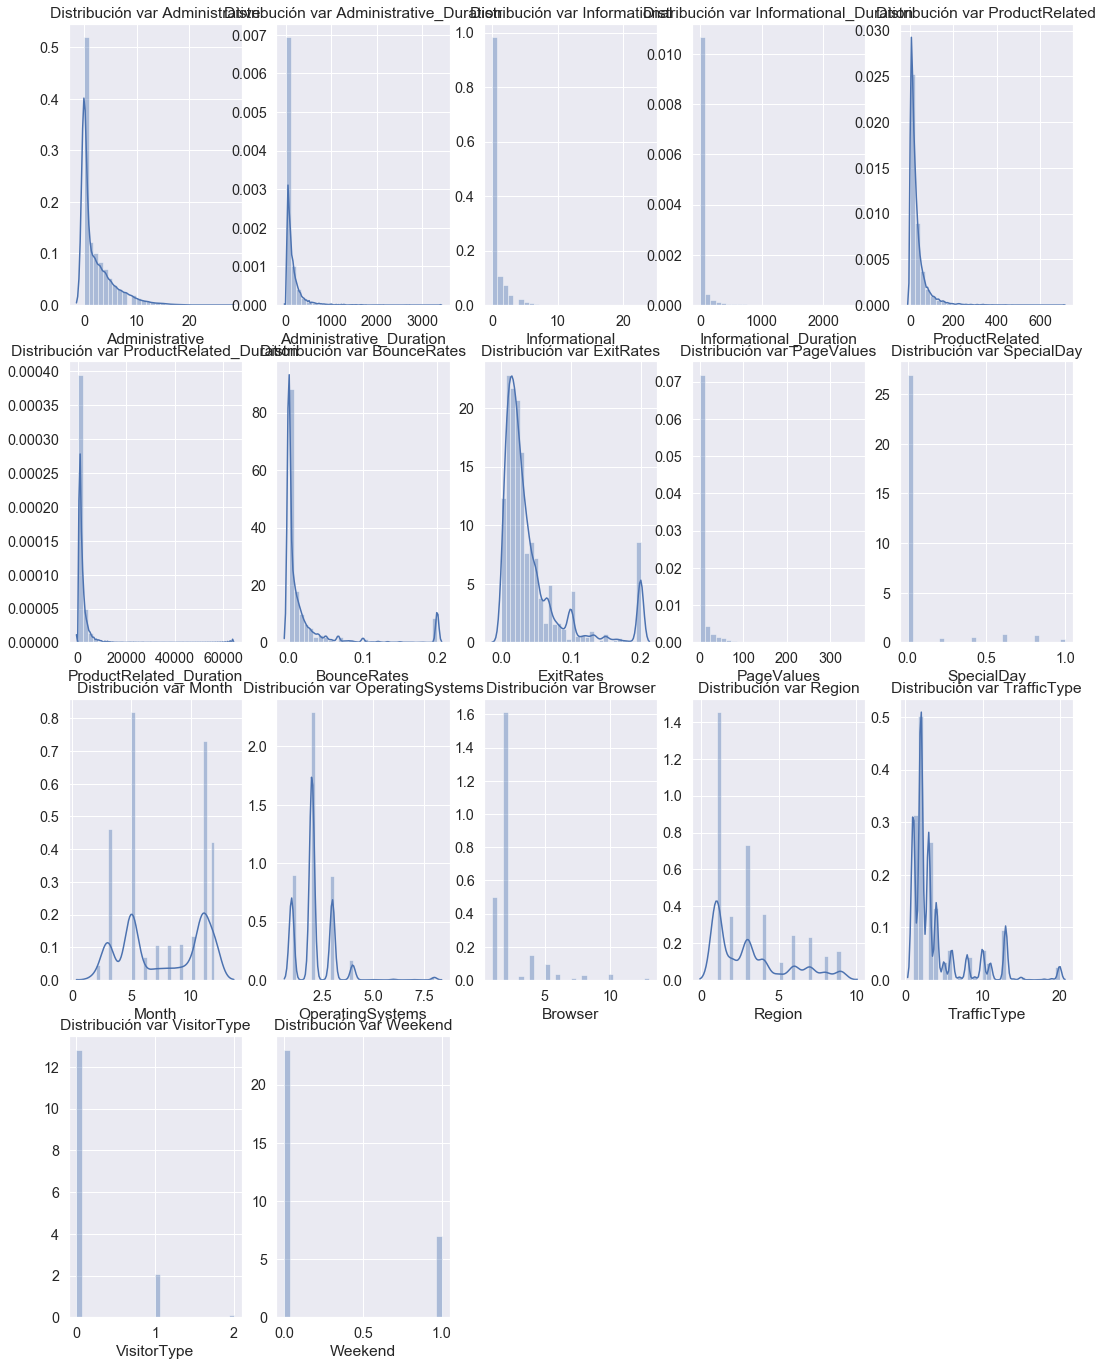

In [21]:
plt.figure(figsize=(18,30))
n = 0
for i, column in enumerate(X.columns):
    n+=1
    plt.subplot(5, 5, n)
    sns.distplot(X[column], bins=30)
    plt.title('Distribución var {}'.format(column))
plt.show()

En los histogramas observamos que las variables no siguen distribuciones normales.

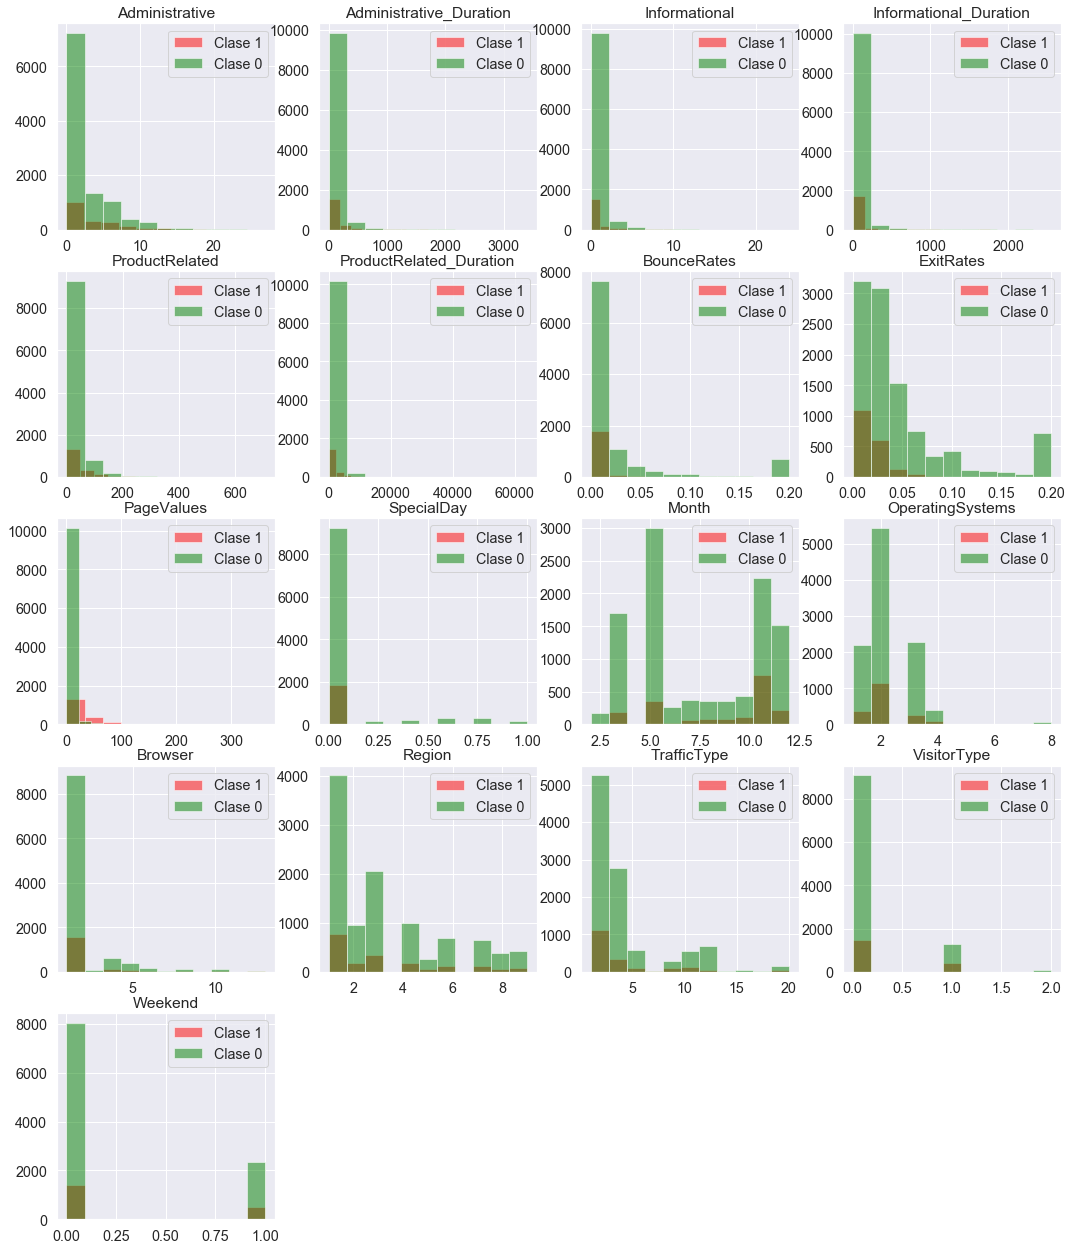

In [22]:
hist_pos_neg_feat(X,Y)

No podemos apreciar variables que discriminen las clases. Solo con un análisis visual no se pueden obtener nuevos datos de valor para nuestro análisis.

In [23]:
X_normalizado = (X-X.mean())/X.std()

In [24]:
X_normalizado[:2]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.697553,-0.457458,-0.396615,-0.245029,-0.691473,-0.624767,3.672477,3.235240,-0.317363,-0.309001,-1.668118,-1.233205,-0.790199,-0.894184,-0.762928,-0.401273,-0.550561
1,-0.697553,-0.457458,-0.396615,-0.245029,-0.668997,-0.591336,-0.457439,1.174544,-0.317363,-0.309001,-1.668118,-0.136191,-0.208136,-0.894184,-0.514456,-0.401273,-0.550561


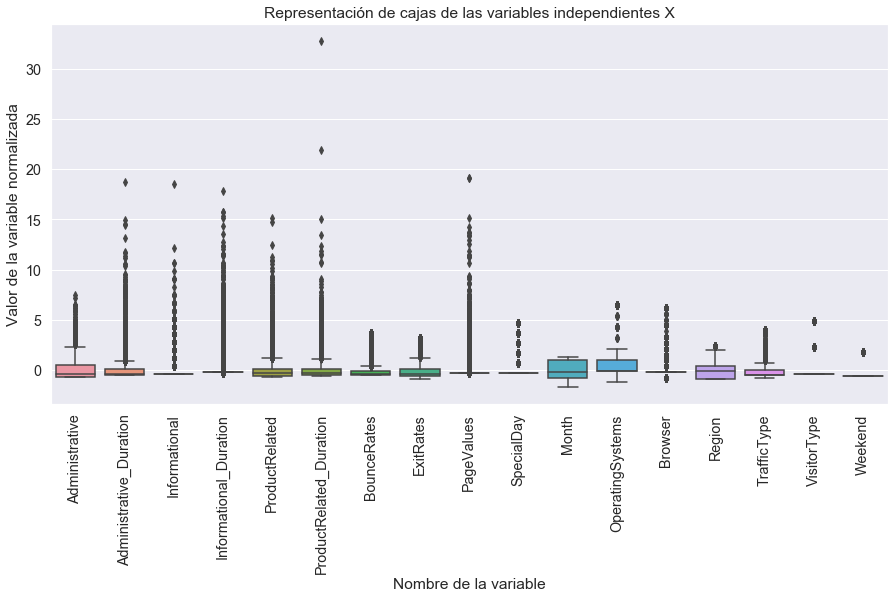

In [25]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=X_normalizado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de las variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Nombre de la variable')

Los valores de las variables se concentran en la parte inferió del gráfico debido a que indican los tiempos que pasan dentro de las webs de compras. Cuando un cliente potencial pasa más tiempo en dicha web se muestra como un posible outlier.
Se puede observar que **Informational, Informational_Duration, PageValues, SpecialDay y Browser** no presentan ninguna distribución.

Procedemos a la estandarización de los datos.

In [26]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

Seguimos con la división en train y test. Recordamos que el conjunto de test nunca se usa para ajustar los modelos, es un conjunto que se separa y se valida al final del todo para obtener una métrica.

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

## Regresión Logística.

Lo siguiente va a ser proceder con un modelo lineal de regresión logística, ya que buscamos predecir la probabilidad de una variable dependiente categórica binaria sin sobreajuste.

In [28]:
modelo1 = LogisticRegression()
parametros = {"C": [0.001, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06], 
              "class_weight":['balanced', None]}

In [29]:
modelo_gs = GridSearchCV(modelo1, param_grid=parametros,
                         cv = 5, scoring='roc_auc')
modelo_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05,
                               0.06],
                         'class_weight': ['balanced', None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [30]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.06, 'class_weight': 'balanced'} 
ROC AUC: 0.9


El mejor resultado obtenido en ROC AUC es de 0.9, el cual es bastante bueno pero vamos a seguir buscando otro modelo.

In [31]:
df_search = pd.DataFrame.from_dict(modelo_gs.cv_results_)

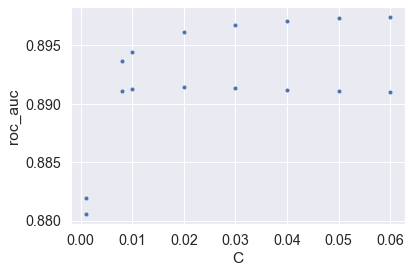

In [32]:
plt.xlabel('C')
plt.ylabel('roc_auc')
_ = plt.plot( df_search['param_C'], df_search['mean_test_score'], '.')

In [33]:
reg_log =  LogisticRegression(C=modelo_gs.best_params_['C'],
                              class_weight=modelo_gs.best_params_['class_weight'])

In [34]:
reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.06, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_test_pred_prob = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

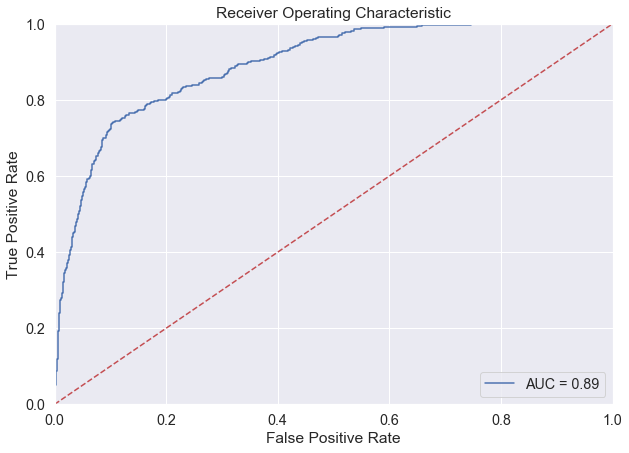

In [36]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

La linea azul es la sensibilidad, la cual es bastante alta y nos da un resultado favorable.

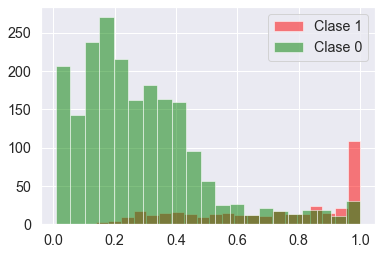

In [37]:
represento_doble_hist(y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, density=0)

Las probabilidades que devuelve el modelo son valores continuos entre 0 y 1. Para pasarlo a 0s y a 1s es necesario usar un umbral de corte. Todo lo que sea mayor que el umbral será predicción = 1, y lo que sea menor será predicción = 0.

In [38]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [39]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nExactitud\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2)))    

Matriz de confusión
 [[1929  159]
 [ 131  245]]

Exactitud	0.88
Sensitividad	0.65
Precisión	0.61


Nos mantenemos en 0.6 el umbral porque nos da un buen rendimiento.

## Red Neuronal Multicapa.

Vamos a probar ahora con un modelo de redes neuronales multicapa perceptrón donde la red puede aprender relaciones mucho más complejas entre los predictores y la variable respuesta. En este caso las neuronas de cada capa se conectan a todas las neuronales de las capas anteriores y de las siguientes.

In [40]:
modelo2 = MLPClassifier()
parametros = {'solver': ['lbfgs'], 
              'max_iter': [100,200,300,500], # Iteraciones máximas en cada red
              'alpha': 10.0 ** -np.arange(1, 10), # Parámetro de regularización L2 para evitar sobreajuste
              'hidden_layer_sizes':np.arange(30, 35), # Número de neuronas en cada capa
              'random_state':[0]}

In [41]:
modelo_gs2 = GridSearchCV(modelo2, param_grid=parametros, cv = 3, 
                         scoring='roc_auc', n_jobs=-1, verbose=10)
modelo_gs2.fit(X_train, Y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
  

In [42]:
print(modelo_gs2.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'alpha': 0.001, 'hidden_layer_sizes': 31, 'max_iter': 100, 'random_state': 0, 'solver': 'lbfgs'} 
ROC AUC: 0.9


Obtenemos los mejores parámetros encontrados y ajustamos el modelo con esos parámetros:

In [43]:
mejor2 = MLPClassifier(**modelo_gs2.best_params_, verbose=10)

In [44]:
mejor2.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=31, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

In [45]:
y_test_pred_prob2 = mejor2.predict_proba(X_test) 
y_test_pred_prob_pos2 = y_test_pred_prob2[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg2 = y_test_pred_prob2[np.where(Y_test == 0)[0]]

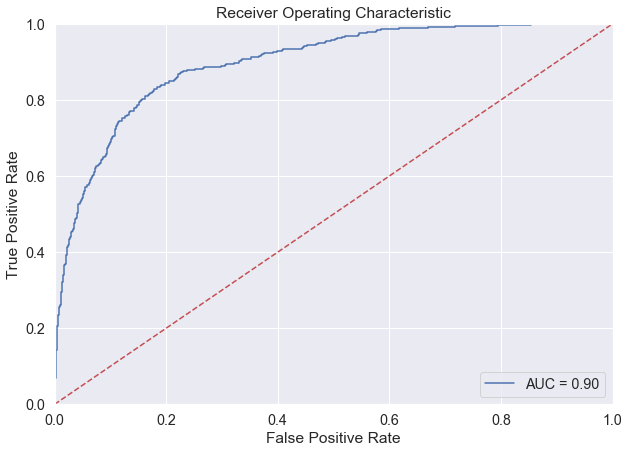

In [46]:
preds2 = y_test_pred_prob2[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds2)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

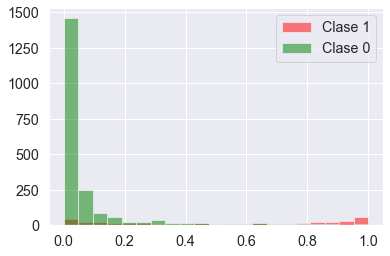

In [47]:
represento_doble_hist(y_test_pred_prob_pos2[:, 1], y_test_pred_prob_neg2[:, 1], n_bins=21, density=0)

In [48]:
umbral2 = 0.3
Y_umbralizadas2 = 1*(y_test_pred_prob2[:, 1] > umbral2)

In [49]:
#Matriz de confusión
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, Y_umbralizadas2))
print("\nExactitud\t{}".format(round(metrics.accuracy_score(Y_test, Y_umbralizadas2),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, Y_umbralizadas2),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, Y_umbralizadas2),2))) 

Matriz de confusión
 [[1907  181]
 [ 132  244]]

Exactitud	0.87
Sensitividad	0.65
Precisión	0.57


## Random Forest Classifier.

Para el tercer modelo vamos a aplicar Random Forest Classifier.

In [50]:
ModeloRFC = RandomForestClassifier(n_estimators = 30,max_depth = 10,random_state = 101)
ModeloRFC.fit(X_train,Y_train)
pred = ModeloRFC.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2088
           1       0.73      0.56      0.63       376

    accuracy                           0.90      2464
   macro avg       0.83      0.76      0.79      2464
weighted avg       0.89      0.90      0.90      2464



In [51]:
y_test_pred_prob3 = ModeloRFC.predict_proba(X_test) 
y_test_pred_prob_pos3 = y_test_pred_prob3[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg3 = y_test_pred_prob3[np.where(Y_test == 0)[0]]

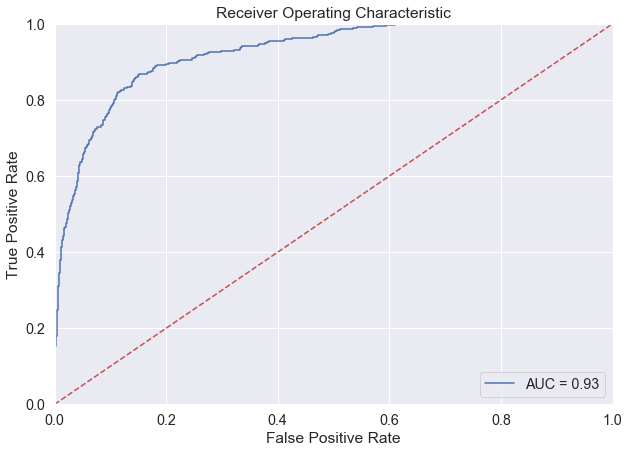

In [52]:
preds3 = y_test_pred_prob3[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds3)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

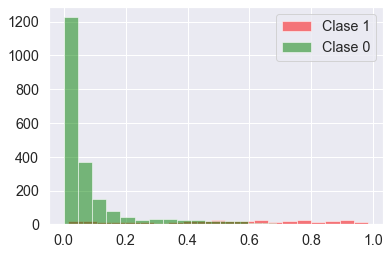

In [53]:
represento_doble_hist(y_test_pred_prob_pos3[:, 1], y_test_pred_prob_neg3[:, 1], n_bins=21, density=0)

In [54]:
umbral3 = 0.2
Y_umbralizadas3 = 1*(y_test_pred_prob3[:, 1] > umbral3)

In [55]:
#Matriz de confusión
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, Y_umbralizadas3))
print("\nExactitud\t{}".format(round(metrics.accuracy_score(Y_test, Y_umbralizadas3),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, Y_umbralizadas3),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, Y_umbralizadas3),2))) 

Matriz de confusión
 [[1841  247]
 [  66  310]]

Exactitud	0.87
Sensitividad	0.82
Precisión	0.56


## Conclusiones

- El modelo con mayor exactitud y precisión ha sido el de Regresión Logística con resultados de 0.88 y 0.61, siendo el que nos ha dado mejores resultados segun la umbralización dada. 
- Existe bastante desequilibrio entre los datos. El número de observaciones en las que el cliente terminó sin comprar es mucho mayor que el de clientes que terminaron comprando en cualquiera de los casos.